# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [1]:
# Import necessary libraries 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
df = pd.read_csv("sample_data/listings.csv.gz")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250804133828,2025-08-04,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250804133828,2025-08-04,city scrape,Funky Urban Gem: Prime Central Location - Park...,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.81,4.77,NaN,f,4,4,0,0,2.32
2,5651579,https://www.airbnb.com/rooms/5651579,20250804133828,2025-08-04,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.88,4.76,4.64,NaN,f,2,1,1,0,2.97
3,6623339,https://www.airbnb.com/rooms/6623339,20250804133828,2025-08-04,city scrape,Bright & Cozy City Stay · Top Location + Parking!,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.68
4,9005989,https://www.airbnb.com/rooms/9005989,20250804133828,2025-08-04,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.93,4.87,4.77,NaN,f,1,1,0,0,5.67


## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



In [5]:
# Add code here 🔧
# Count missing values per column
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column (top 20):")
print(missing_counts.head(20))

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("\nPercentage of missing values (top 20):")
print(missing_percentage.head(20))

Missing values per column (top 20):
license                         459
calendar_updated                459
neighbourhood_group_cleansed    459
neighbourhood                   263
neighborhood_overview           263
host_about                      208
host_location                   114
host_neighbourhood               70
last_review                      68
first_review                     68
review_scores_location           68
review_scores_accuracy           68
reviews_per_month                68
review_scores_value              68
review_scores_cleanliness        68
review_scores_communication      68
review_scores_checkin            68
review_scores_rating             68
beds                             40
bathrooms                        40
dtype: int64

Percentage of missing values (top 20):
license                         100.000000
calendar_updated                100.000000
neighbourhood_group_cleansed    100.000000
neighbourhood                    57.298475
neighborhood_overvi

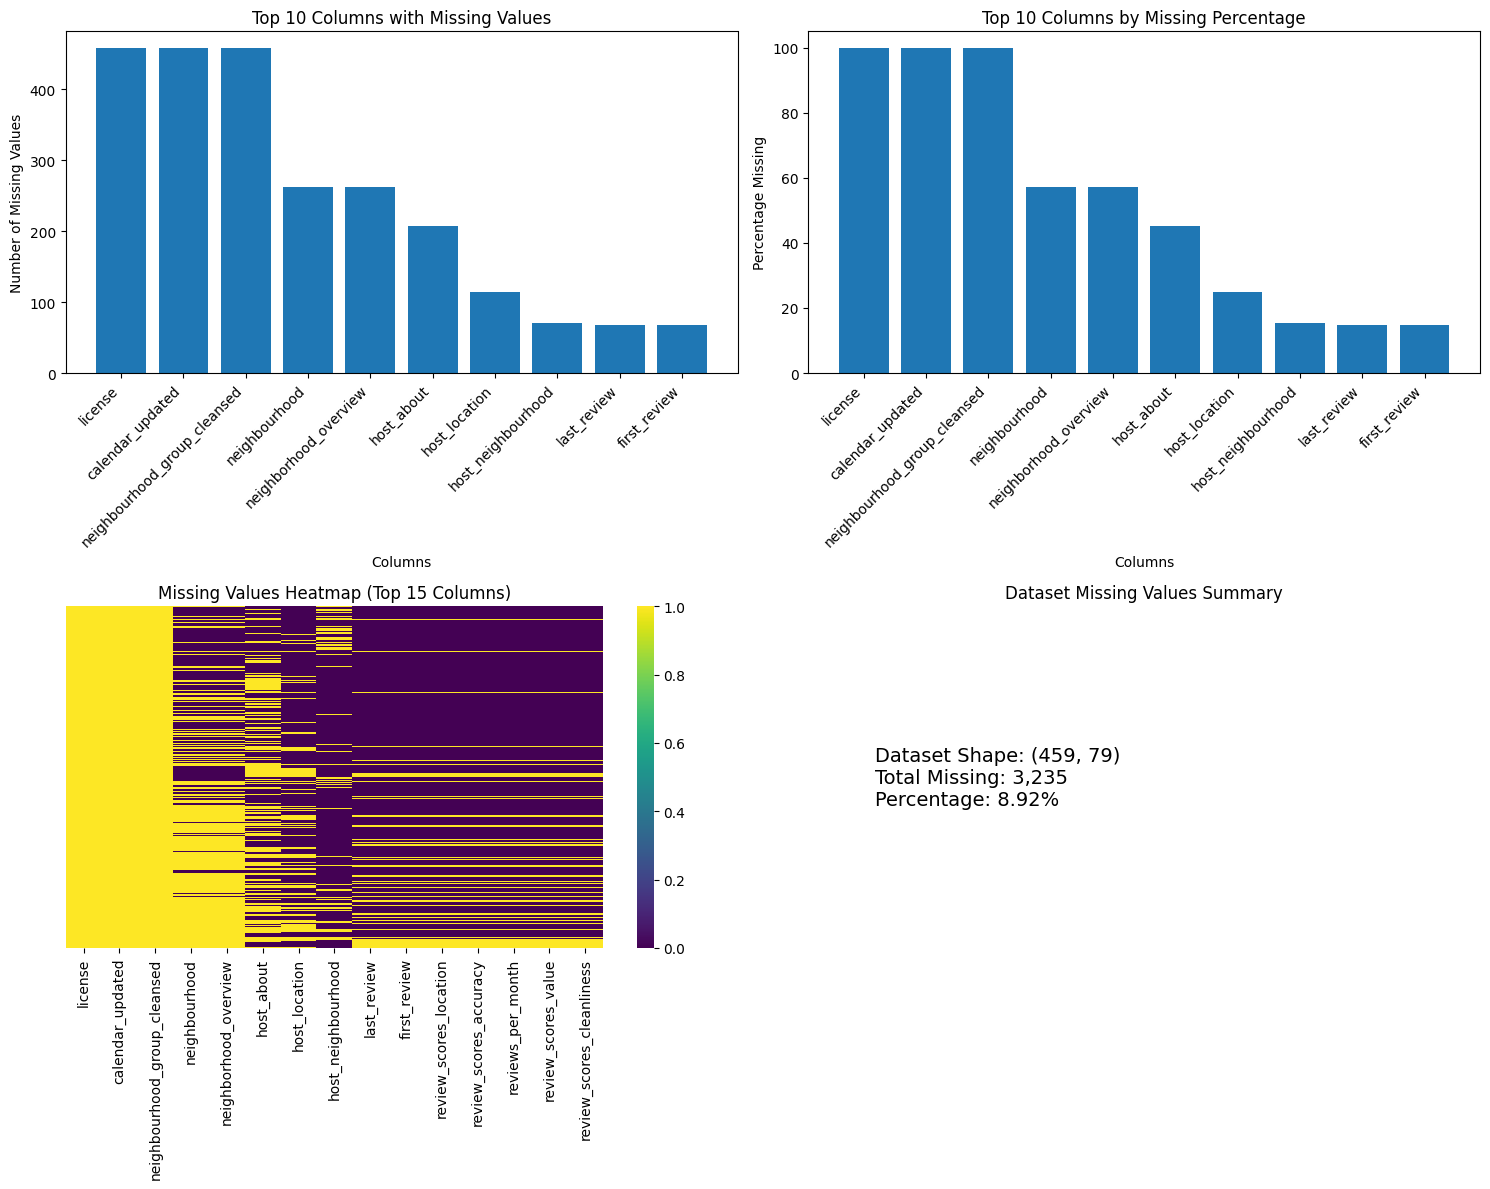

In [6]:
# Create visualizations for missing values
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Bar chart of top missing columns
top_missing = missing_counts.head(10)
axes[0,0].bar(range(len(top_missing)), top_missing.values)
axes[0,0].set_title('Top 10 Columns with Missing Values')
axes[0,0].set_xlabel('Columns')
axes[0,0].set_ylabel('Number of Missing Values')
axes[0,0].set_xticks(range(len(top_missing)))
axes[0,0].set_xticklabels(top_missing.index, rotation=45, ha='right')

# Percentage bar chart
top_missing_pct = missing_percentage.head(10)
axes[0,1].bar(range(len(top_missing_pct)), top_missing_pct.values)
axes[0,1].set_title('Top 10 Columns by Missing Percentage')
axes[0,1].set_xlabel('Columns')
axes[0,1].set_ylabel('Percentage Missing')
axes[0,1].set_xticks(range(len(top_missing_pct)))
axes[0,1].set_xticklabels(top_missing_pct.index, rotation=45, ha='right')

# Heatmap of missing values for selected columns
columns_to_show = missing_counts[missing_counts > 0].head(15).index
missing_matrix = df[columns_to_show].isnull()
sns.heatmap(missing_matrix, yticklabels=False, cbar=True, cmap='viridis', ax=axes[1,0])
axes[1,0].set_title('Missing Values Heatmap (Top 15 Columns)')

# Overall missing values summary
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
missing_summary = pd.DataFrame({
    'Total Cells': [total_cells],
    'Missing Cells': [total_missing],
    'Percentage Missing': [total_missing/total_cells * 100]
})

axes[1,1].text(0.1, 0.5, f'Dataset Shape: {df.shape}\nTotal Missing: {total_missing:,}\nPercentage: {total_missing/total_cells*100:.2f}%',
               fontsize=14, verticalalignment='center')
axes[1,1].set_title('Dataset Missing Values Summary')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. The top 3 columns with the most missing values are:

- license (459 missing values, 100% missing)
- calendar_updated (459 missing values, 100% missing)
- neighbourhood_group_cleansed (459 missing values, 100% missing)

2. Several columns could create significant business issues:

- host_about (208 missing, 45% missing) - Missing host - descriptions could impact guest trust and booking decisions
- host_location (114 missing, 25% missing) - Important for transparency and local regulations
- neighbourhood and neighbourhood_overview (263 missing each, 57% missing) - Critical for location-based searches and pricing analysis
- Review score columns (68 missing each, 15% missing) - Essential for quality assessment and ranking algorithms
- beds and bathrooms (40 missing each, 9% missing) - Key property characteristics that affect booking decisions and pricing

3. The following columns can be safely dropped:

- license (100% missing) - Completely empty, provides no value
- calendar_updated (100% missing) - No data available
- neighbourhood_group_cleansed (100% missing) - Entirely missing
- last_review and first_review (68 missing each, 15% missing) - While useful, properties without reviews are still valid listings
- reviews_per_month (68 missing, 15% missing) - Can be calculated from other review data when needed


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [8]:
# Add code here 🔧
# Based on the missing value analysis, drop columns that are problematic
columns_to_drop = [
    'license',
    'calendar_updated',
    'neighbourhood_group_cleansed',
    'scrape_id'
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Show first few rows of cleaned dataset
print("\nFirst few rows of cleaned dataset:")
df_cleaned.info()


First few rows of cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            459 non-null    int64  
 1   listing_url                                   459 non-null    object 
 2   last_scraped                                  459 non-null    object 
 3   source                                        459 non-null    object 
 4   name                                          459 non-null    object 
 5   description                                   449 non-null    object 
 6   neighborhood_overview                         196 non-null    object 
 7   picture_url                                   459 non-null    object 
 8   host_id                                       459 non-null    int64  
 9   host_url                     

### ✍️ Your Response: 🔧
1.

- license
- calendar_updated
- neighbourhood_group_cleansed
- scrape_id

2.

- license: Completely empty with 100% missing values - provides zero information for analysis or business decisions
- calendar_updated: Also 100% missing - cannot be used for any calendar-related analysis or host activity tracking
- neighbourhood_group_cleansed: Entirely missing data means it cannot support location-based analysis or neighborhood groupings
- scrape_id: This is purely technical metadata about when the data was collected - it has no relevance for business analysis, pricing, host management, or guest experience

3.

- Analysis errors: Columns with 100% missing values could cause calculation errors or misleading statistics when computing averages or correlations
- Model performance: Machine learning algorithms might struggle or produce unreliable results when fed completely empty features
- Visualization issues: Charts and dashboards could break or display confusing empty sections


## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [9]:
# Your code for converting column data types 🔧
# Choose two columns to clean: price and bathrooms
print("Missing values before cleaning:")
print(f"Price: {df_cleaned['price'].isnull().sum()} missing")
print(f"Bathrooms: {df_cleaned['bathrooms'].isnull().sum()} missing")

# Clean price column - remove $ and convert to numeric
df_cleaned['price_numeric'] = df_cleaned['price'].str.replace('$', '').str.replace(',', '').astype('float', errors='ignore')

# Fill missing price with median
price_median = df_cleaned['price_numeric'].median()
df_cleaned.loc[:, 'price_numeric'] = df_cleaned['price_numeric'].fillna(price_median)

# Fill missing bathrooms with median
bathrooms_median = df_cleaned['bathrooms'].median()
df_cleaned.loc[:, 'bathrooms'] = df_cleaned['bathrooms'].fillna(bathrooms_median)

print(f"\nAfter cleaning:")
print(f"Price: {df_cleaned['price_numeric'].isnull().sum()} missing")
print(f"Bathrooms: {df_cleaned['bathrooms'].isnull().sum()} missing")
print(f"Filled with medians: ${price_median:.2f} and {bathrooms_median} bathrooms")

Missing values before cleaning:
Price: 40 missing
Bathrooms: 40 missing

After cleaning:
Price: 0 missing
Bathrooms: 0 missing
Filled with medians: $95.00 and 1.0 bathrooms


### ✍️ Your Response: 🔧
1.

I cleaned two columns:

- Price (40 missing values)
- Bathrooms (40 missing values)

2.
- Price: Used median imputation (\$95.00) after converting the text format (removing \$ and commas) to numeric. I chose median because it's less sensitive to extreme values than mean, which is important for pricing data that often has outliers.
- Bathrooms: Used median imputation (1.0 bathrooms). Median is appropriate here because bathroom counts are discrete values and median avoids the influence of properties with unusually high bathroom counts.


3.
- Artificial clustering: All missing prices are now set to exactly \$95.00, which could create an artificial spike in pricing analysis and distort market insights.
- Lost variance: The true variability in pricing and bathroom counts is reduced, potentially leading to underestimation of market diversity.
- Bias in correlations: If missing values weren't random (e.g., certain property types more likely to have missing prices), the median imputation could introduce systematic bias.

## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [12]:
# Clean or adjust your dataset 🔧
# Examine data types to find columns that need conversion
print("Current data types for key columns:")
print(f"price: {df_cleaned['price'].dtype}")
print(f"host_response_rate: {df_cleaned['host_response_rate'].dtype}")
print(f"host_acceptance_rate: {df_cleaned['host_acceptance_rate'].dtype}")

# Check sample values to understand the format
print("\nSample values:")
print("host_response_rate:", df_cleaned['host_response_rate'].dropna().head(5).tolist())
print("host_acceptance_rate:", df_cleaned['host_acceptance_rate'].dropna().head(5).tolist())

# Convert host_response_rate from percentage string to numeric
df_cleaned['host_response_rate_numeric'] = (
    df_cleaned['host_response_rate']
    .str.replace('%', '')
    .astype('float', errors='ignore')
)

# Convert host_acceptance_rate from percentage string to numeric
df_cleaned['host_acceptance_rate_numeric'] = (
    df_cleaned['host_acceptance_rate']
    .str.replace('%', '')
    .astype('float', errors='ignore')
)

# Verify the conversion
print(f"\nAfter conversion:")
print(f"host_response_rate_numeric type: {df_cleaned['host_response_rate_numeric'].dtype}")
print(f"host_acceptance_rate_numeric type: {df_cleaned['host_acceptance_rate_numeric'].dtype}")


Current data types for key columns:
price: object
host_response_rate: object
host_acceptance_rate: object

Sample values:
host_response_rate: ['100%', '100%', '100%', '100%', '100%']
host_acceptance_rate: ['50%', '100%', '99%', '100%', '100%']

After conversion:
host_response_rate_numeric type: float64
host_acceptance_rate_numeric type: float64


In [13]:
print("Response rate (%):")
print(df_cleaned['host_response_rate_numeric'].describe())
print("\nAcceptance rate (%):")
print(df_cleaned['host_acceptance_rate_numeric'].describe())

Response rate (%):
count    431.000000
mean      95.744780
std       13.737906
min        0.000000
25%       98.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: host_response_rate_numeric, dtype: float64

Acceptance rate (%):
count    446.000000
mean      87.865471
std       22.650442
min        0.000000
25%       87.000000
50%       98.000000
75%      100.000000
max      100.000000
Name: host_acceptance_rate_numeric, dtype: float64


### ✍️ Your Response: 🔧
1.
I fixed the host_response_rate and host_acceptance_rate columns, which were both stored as text/object type with percentage symbols (e.g., "100%", "99%").

2.
For both columns, I applied the following steps:

- Removed the percentage symbol (%) using .str.replace('%', '')
- Converted from string to float using .astype('float', errors='coerce')
- Created new numeric columns (host_response_rate_numeric and host_acceptance_rate_numeric)

3.
This conversion provides several benefits for future analysis:

- Mathematical operations: Can now calculate averages, correlations, and perform statistical analysis on response/acceptance rates
- Filtering and comparisons: Can easily filter for hosts with response rates above/below certain thresholds (e.g., > 90%)
- Visualization: Can create histograms, scatter plots, and other numeric visualizations without text formatting issues

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [14]:
# Add code here 🔧
# Check for exact duplicates across all columns
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_count}")

# Check for duplicate IDs (each listing should have unique ID)
duplicate_ids = df_cleaned['id'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

# Show some basic info about duplicates
print(f"Total rows in dataset: {len(df_cleaned)}")
print(f"Unique IDs in dataset: {df_cleaned['id'].nunique()}")

# Remove exact duplicates if any exist
if duplicate_count > 0:
    print(f"\nRemoving {duplicate_count} duplicate rows...")
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Rows after removing duplicates: {len(df_cleaned)}")
else:
    print("\nNo exact duplicates found - no action needed")

# Verify no duplicate IDs remain
remaining_duplicate_ids = df_cleaned['id'].duplicated().sum()
print(f"Duplicate IDs after cleaning: {remaining_duplicate_ids}")

Number of exact duplicate rows: 0
Number of duplicate IDs: 0
Total rows in dataset: 459
Unique IDs in dataset: 459

No exact duplicates found - no action needed
Duplicate IDs after cleaning: 0


### ✍️ Your Response: 🔧 🔧
1.
No, I did not find any duplicates. The results show:

- 0 exact duplicate rows across all columns
- 0 duplicate IDs (all 459 listings have unique IDs)
- Total rows (459) equals unique IDs (459), confirming data integrity

2.
Since no duplicates were found, no decision-making was necessary. However, my approach was designed to:

- Check for exact duplicates first (same values across all columns)
- Verify ID uniqueness since each Airbnb listing should have a unique identifier
- Remove any exact duplicates while keeping the first occurrence if found
- Prioritize data completeness while ensuring uniqueness

3.
Duplicates pose several business risks:

- Revenue miscalculation: Double-counting listings would inflate total revenue estimates and market size analysis
- Host confusion: Duplicate listings could confuse guests and create booking conflicts for the same property
- Analytics distortion: Skewed metrics for average prices, occupancy rates, and performance benchmarks



## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [15]:
# export csv here 🔧
df_cleaned.to_csv('sample_data/cleaned_airbnb_data.csv', index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. The most challenging aspect was dealing with the high percentage of missing values in
several columns (some 100% missing). It was surprising that columns like 'license'
were completely empty, suggesting either data collection issues or that this information
isn't consistently tracked across markets.
2. I used a business-value approach: dropped columns with 100% missing values or no
business relevance (technical metadata), filled critical business columns like price
and bathrooms with median values, and converted percentage strings to numeric for
analysis capability. I prioritized keeping data that would be essential for pricing,
booking decisions, and host performance analysis.

3. A pricing analytics team could now perform quantitative analysis on host response rates,
acceptance rates, and pricing to identify patterns that lead to higher booking success.
With clean numeric data, they could build models to recommend optimal pricing strategies
based on property characteristics and host responsiveness.
4. I would investigate the review score patterns more deeply - understanding why 68 properties
have no reviews and whether this represents new listings or inactive properties. I'd also
clean the amenities column (currently text) to extract individual amenities as binary
features for better analysis.
5. This assignment directly supports developing practical data preparation skills essential
for business analytics. Learning to make informed decisions about missing data, data
types, and data quality issues prepares me to work with real-world messy datasets in
professional settings where clean, reliable data is crucial for business decision-making.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_06_LastnameFirstname.ipynb"